In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [161]:
# dados = pd.read_csv('dados/sp_completo.csv')
# modelos = pd.read_csv("modelos_sp.csv")
# marcas = pd.read_csv("marcas_sp.csv")

dados = pd.read_csv('dados/se_completo.csv')
modelos = pd.read_csv("modelos.csv")
marcas = pd.read_csv("marcas.csv")


In [162]:
modelos_dict = {}
for index, modelo in modelos.iterrows():
    for index, marca in marcas.iterrows():
        if(marca['description'] in modelo['description']):
            modelos_dict[modelo['id']] = modelo['description'].replace(
                marca['description'], "").strip()[:17]

In [163]:
marcas_dict = {}
for index, marca in marcas.iterrows():
    if(" - " in marca['description']):
        marcas_dict[marca['id']] = marca['description'].split("-")[1].strip()
    else:
        marcas_dict[marca['id']] = marca['description']


In [164]:
plot_modelo = pd.DataFrame(dados.modelo.value_counts().rename_axis(
    'modelo').reset_index(name='counts'))
plot_modelo = plot_modelo.sort_values('counts', ascending=False)[:10]

plot_marca = pd.DataFrame(dados.marca.value_counts().rename_axis(
    'marca').reset_index(name='counts'))
plot_marca = plot_marca.sort_values('counts', ascending=False)[:10]


In [165]:
plot_modelo['modelo'] = plot_modelo['modelo'].map(modelos_dict)
plot_marca['marca'] = plot_marca['marca'].map(marcas_dict)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


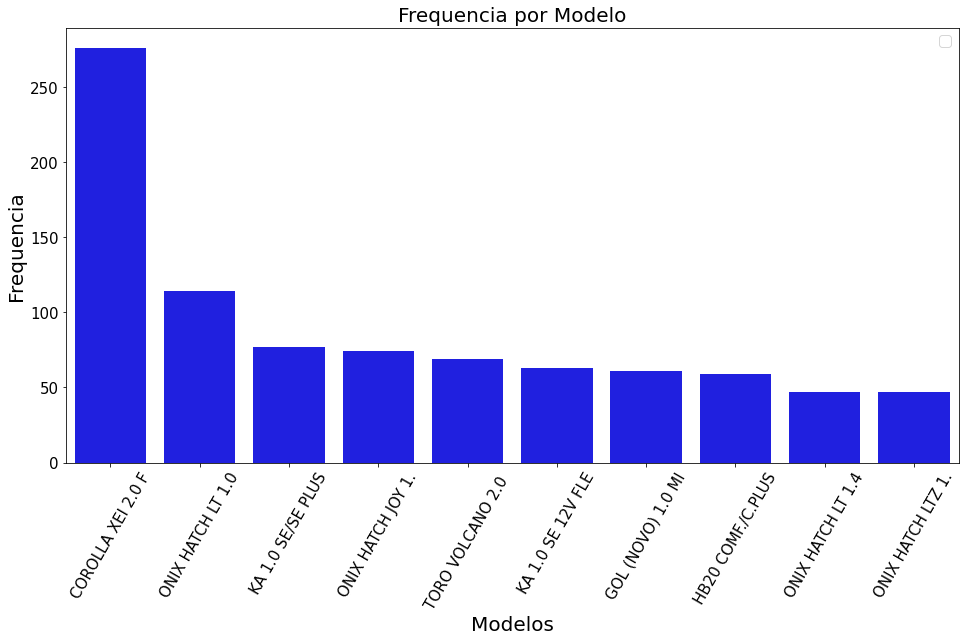

In [168]:
plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.barplot(data=plot_modelo,
            x='modelo', y="counts", color="blue")
plt.xticks(rotation=60)
plt.xlabel('Modelos', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Frequencia por Modelo', fontsize=20)
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


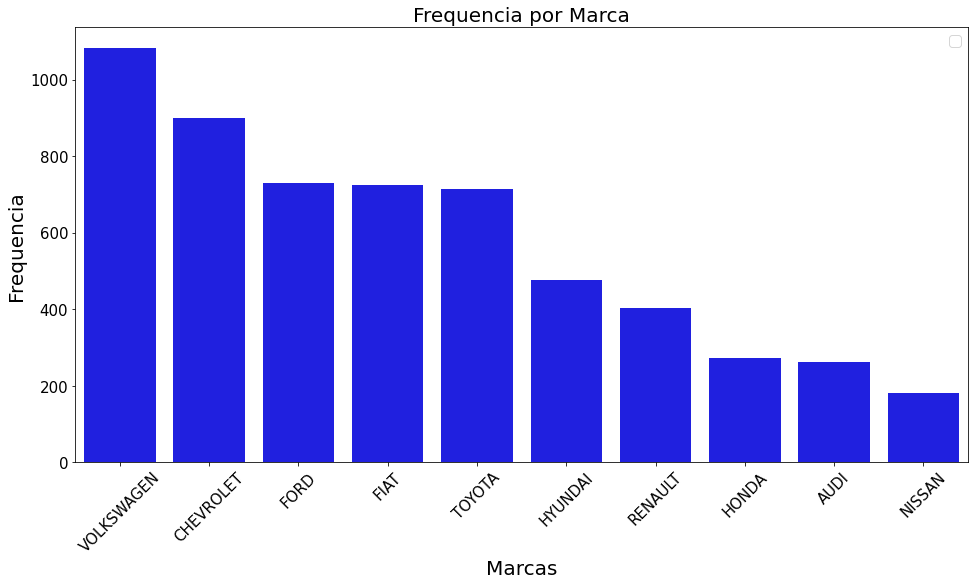

In [167]:
plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.barplot(data=plot_marca,
            x='marca', y="counts", color="blue")
plt.xticks(rotation=45)
plt.xlabel('Marcas', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Frequencia por Marca', fontsize=20)
plt.legend()
